In [ ]:
#%%

import scanpy as sc
import os
import numpy as np
from sklearn import metrics
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# %%

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 


def celltype_frac(x, col_name):
    val_counts = x[col_name].value_counts()
    return val_counts.values[0] / val_counts.values.sum()


def compute_celltype_purity(ad, col_name, starting):
    """
    Compute the purity (prevalence of most abundant value) of the specified col_name from ad.obs within each metacell.
    @param: ad - AnnData object with SEACell assignment and col_name in ad.obs dataframe
    @param: col_name - (str) column name within ad.obs representing celltype groupings for each cell.
    """

    celltype_fraction = ad.obs.groupby(starting).apply(lambda x: celltype_frac(x, col_name))
    celltype = ad.obs.groupby(starting).apply(lambda x: x[col_name].value_counts().index[0])

    return pd.concat([celltype, celltype_fraction], axis=1).rename(columns={0: col_name, 1: f'{col_name}_purity'})

In [ ]:
#%%

# for endothelial metacells
celltype="fibroblasts"
adatas_paths = {
    "original": "/group/testa/Project/OvarianAtlas/atlas_project/raw_data/metacells_backup/metacells/{}/seacells_assignment_hdg_patients.h5ad".format(celltype),
    "original_integration": "/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration_backup/integration/cells/{}/scgen_batch_corr_celltypes_HDG.h5ad".format(celltype),
    "step0_no_seed": "/group/testa/Project/OvarianAtlasTestStep0/raw_data/metacells_step0/{}/seacells_assignment_hdg_patients.h5ad".format(celltype),
    "step0_seed1":"/group/testa/Project/OvarianAtlasTestStep0/raw_data/metacells/{}/seacells_assignment_hdg_patients_seed_1.h5ad".format(celltype),
    "step0_seed1_rerun": "/group/testa/Project/OvarianAtlasTestStep0/raw_data/metacells/{}/seacells_assignment_hdg_patients_seed_2.h5ad".format(celltype),
    "step0_seed2": "/group/testa/Project/OvarianAtlasTestStep0/raw_data/metacells/{}/seacells_assignment_hdg_patients_seed_3.h5ad".format(celltype),
    "original_seed1": "/group/testa/Project/OvarianAtlasTestStep0/raw_data/metacells/{}/seacells_assignment_hdg_patients_marta.h5ad".format(celltype),
    "original_tables_seed1": "/group/testa/Project/OvarianAtlasTestStep0/raw_data/metacells/{}/seacells_assignment_hdg_patients_marta.h5ad".format(celltype),
    #"rerun": "/group/testa/Project/OvarianAtlas/atlas_project/raw_data/metacells_backup/metacells/endothelial/seacells_assignment_hdg_patients_TEST270225.h5ad"
}
adatas = {key: sc.read_h5ad(path) for key, path in adatas_paths.items()}

def copy_seacell(adata, adata2, name):
    adata.obs[name] = adata2.obs["SEACell"]
    adata.obs[name + '_patient_tissue'] = adata.obs[name].astype('str') + '_' + adata.obs['paper_ID'].astype('str') + '_' + adata.obs['tissue'].astype('str')

for key, adata in adatas.items():
    copy_seacell(adatas["original"], adata, "SEACell_" + key)

In [ ]:
#%%

adata = adatas["original"]

In [ ]:
# %%

def print_hist(key):
    print(key)
    comparison_key = "SEACell_" + key + "_patient_tissue"
    for key, _ in adatas.items():
        compute_celltype_purity(adata, "SEACell_" + key + "_patient_tissue", comparison_key).hist()

original


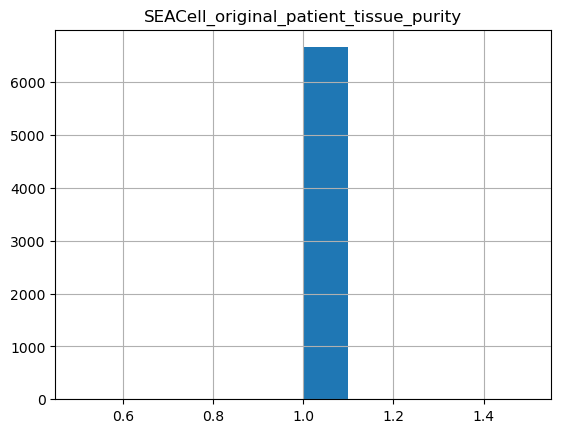

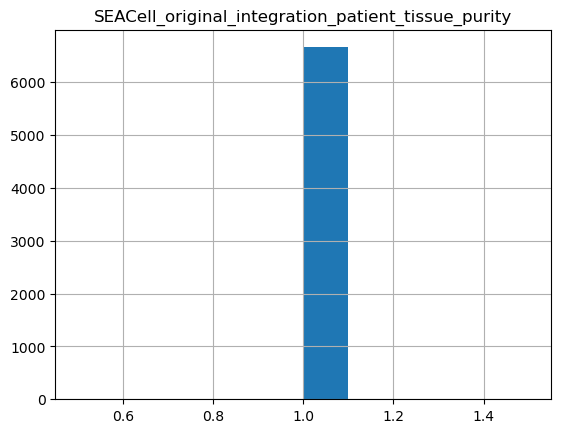

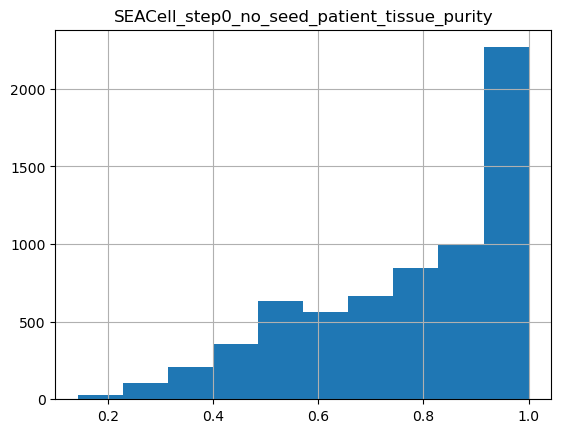

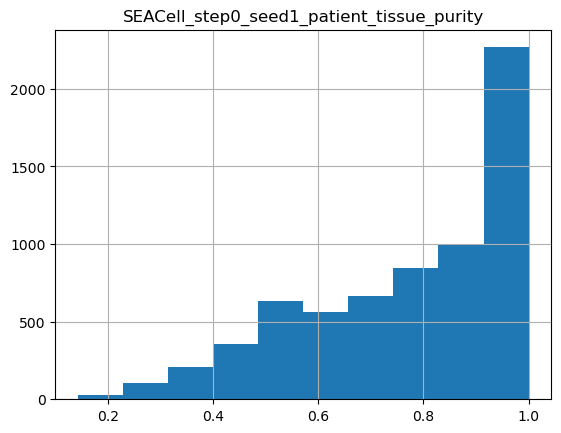

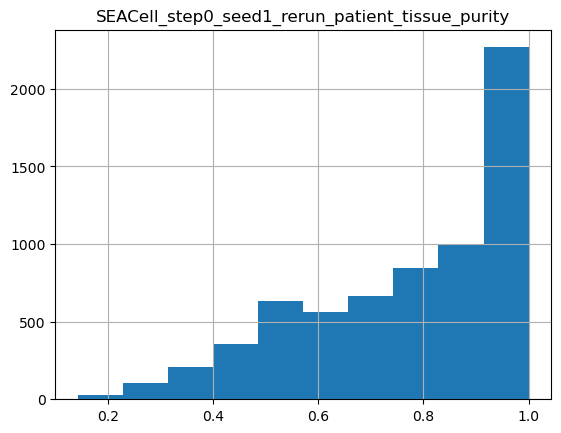

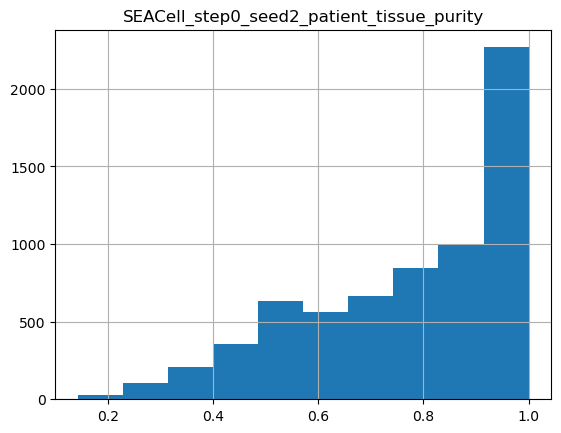

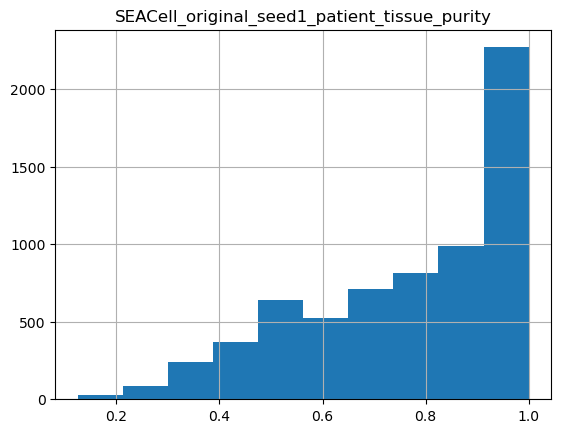

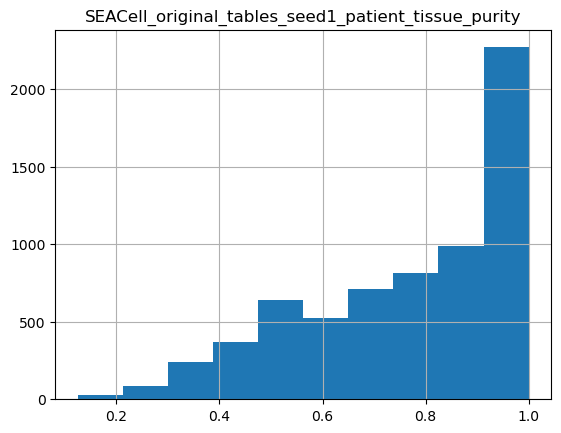

In [ ]:
# %%

print_hist("original")

step0_no_seed


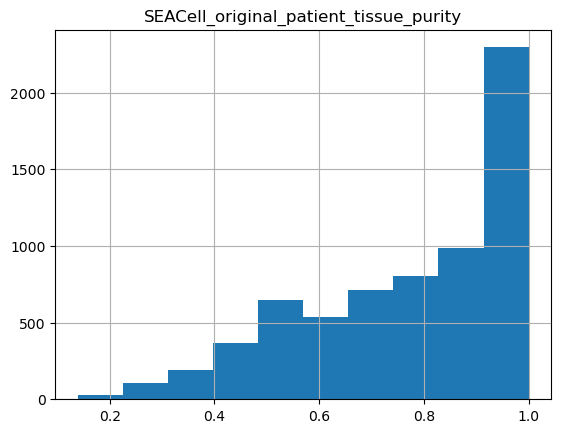

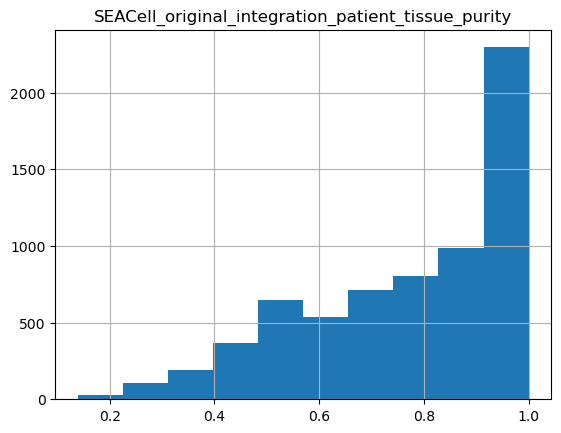

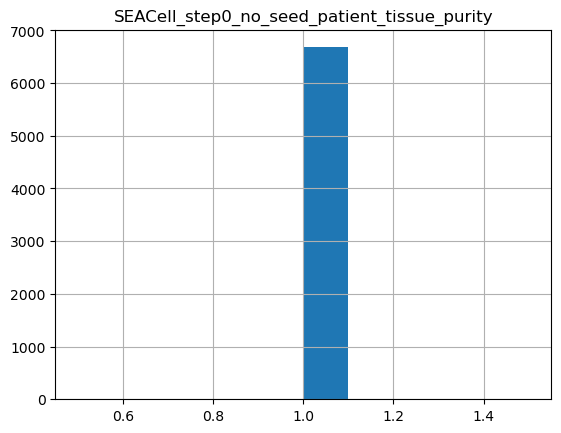

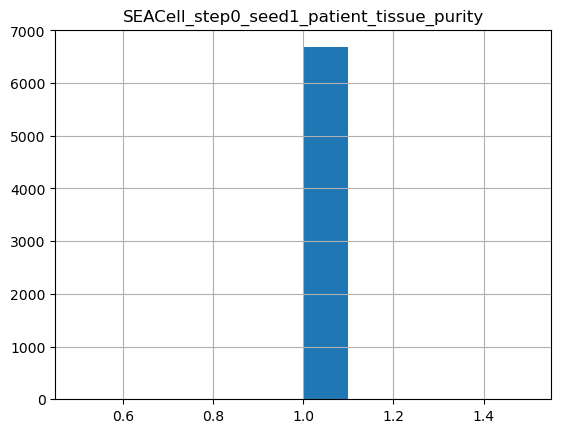

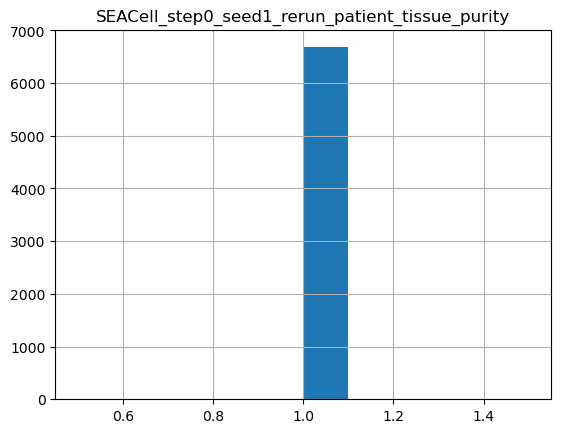

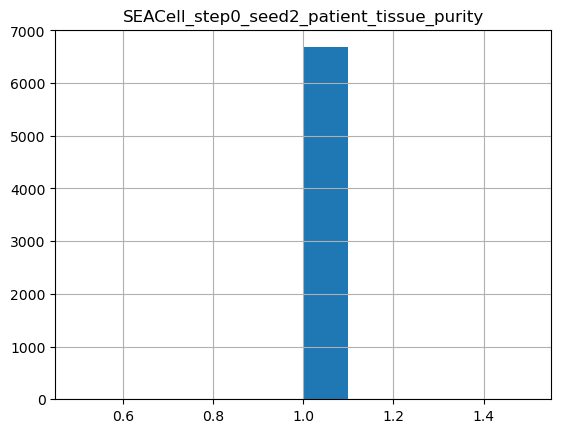

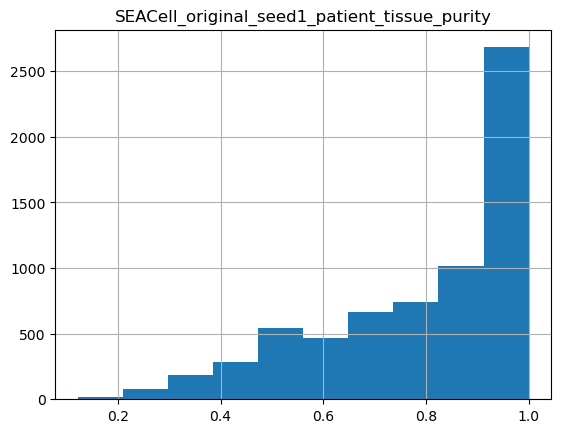

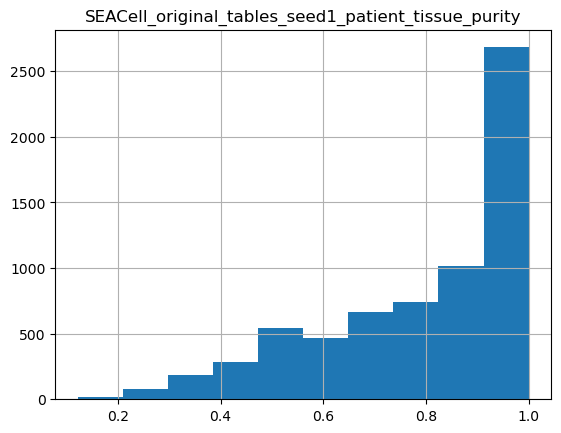

In [ ]:
#%%

print_hist("step0_no_seed")

original_tables_seed1


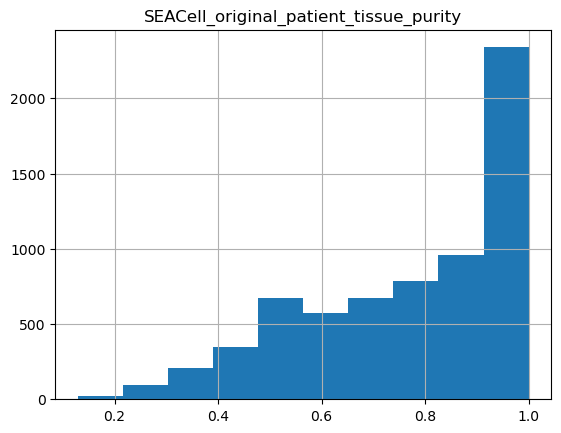

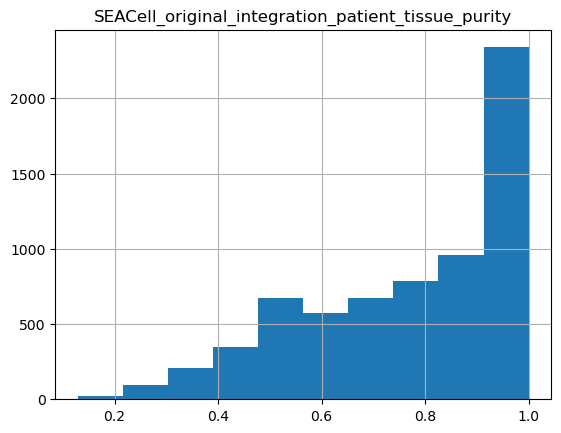

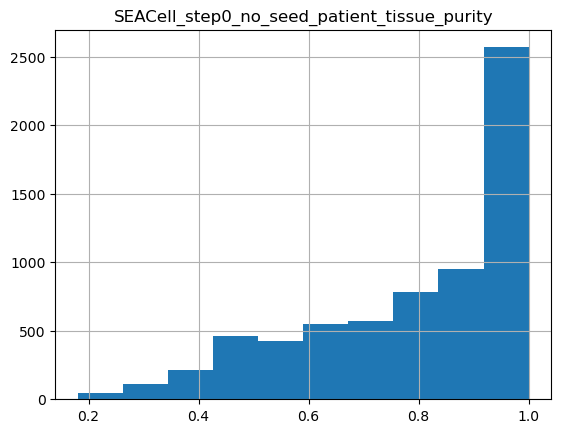

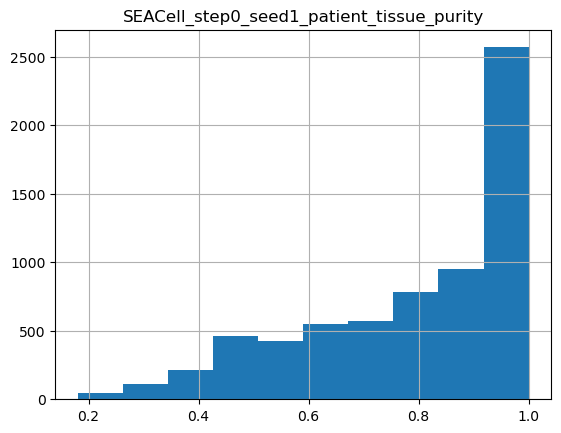

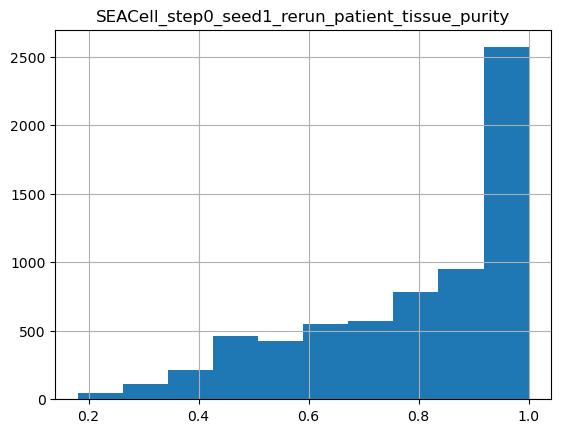

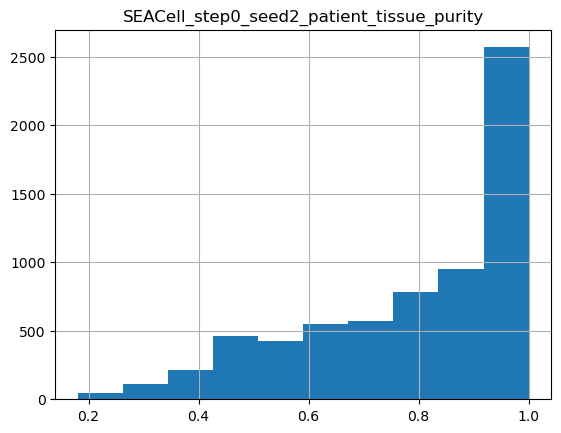

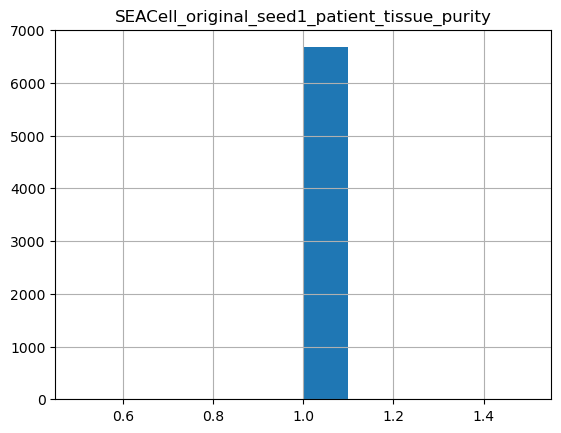

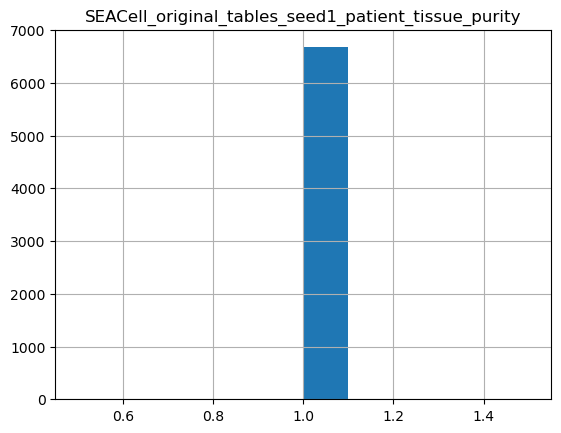

In [ ]:
#%%

print_hist("original_tables_seed1")

original_integration


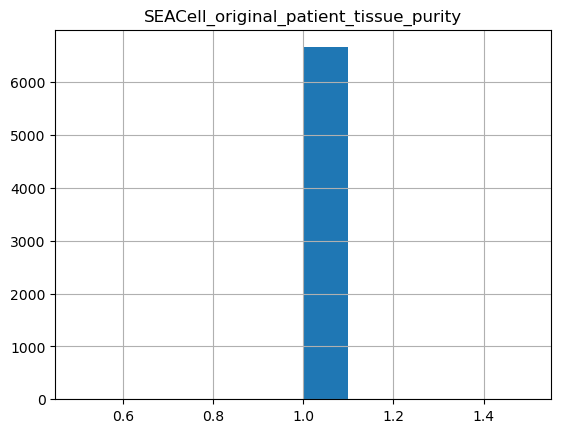

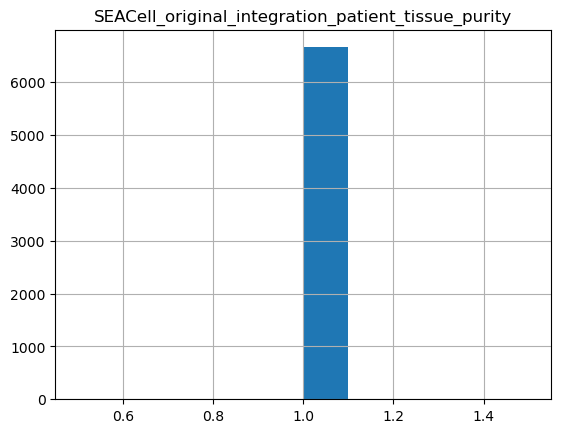

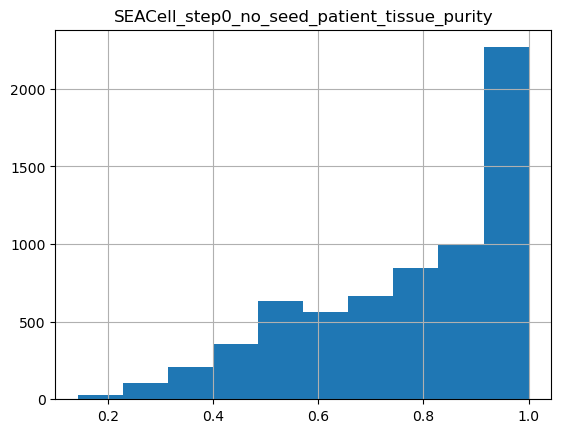

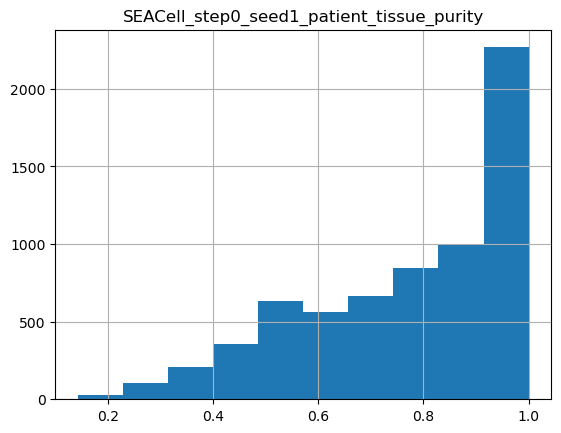

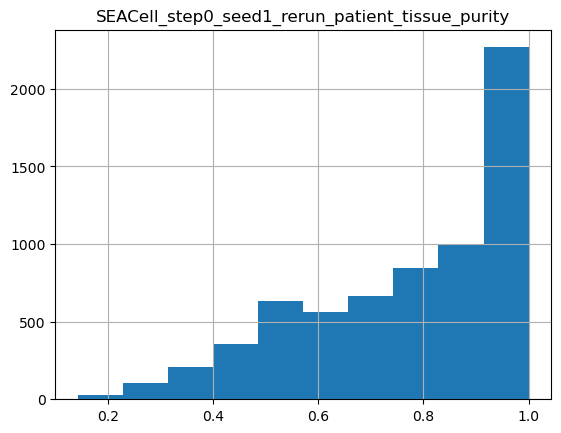

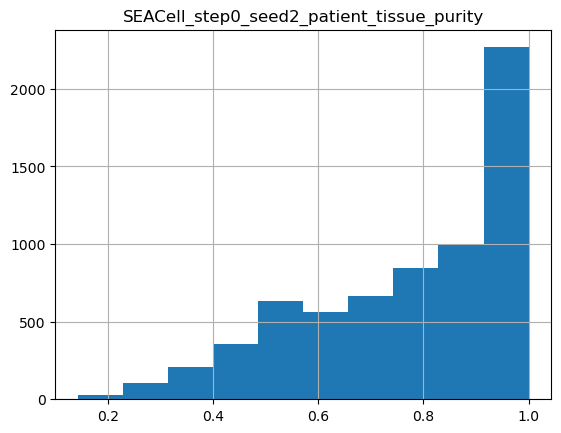

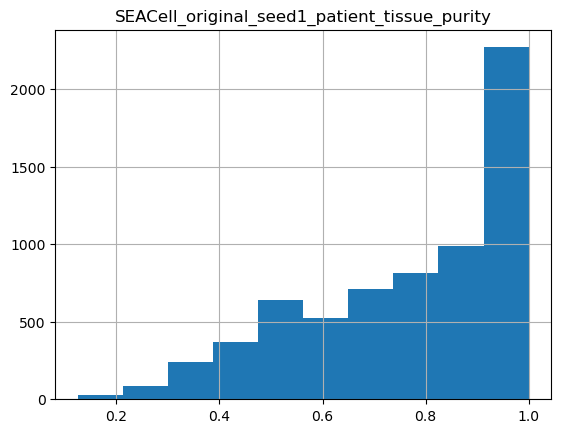

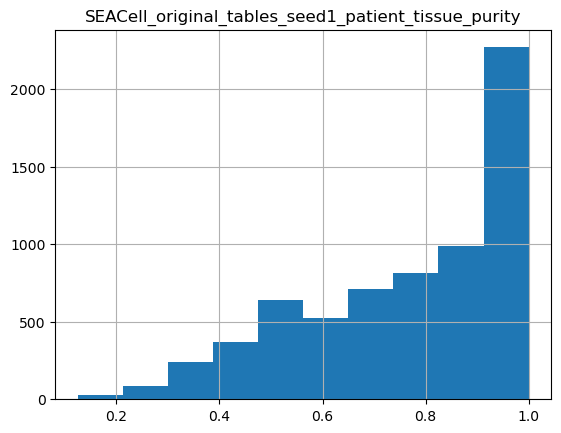

In [ ]:
# %%

print_hist("original_integration")